In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#read data from conpressed file
vehicle_data = pd.read_csv("vehicle_data.csv.gz",
               compression="gzip")

#strip extra spaces in field
vehicle_data['fuel_type'].str.rstrip().astype(str)
vehicle_data['elec_hybrid']= vehicle_data['fuel_type'].isin(['ELECTRIC','NONE','OTHER'])
vehicle_data


,vin,registration_class,zip,model_year,body_type,fuel_type,elec_hybrid
0,999407G3573,PAS,12866,1976,SUBN,GAS,False
1,9992313,PAS,13316,1924,CONV,GAS,False
2,998867,PAS,11501,1952,2DSD,GAS,False
3,9983692,PAS,10940,1936,2DSD,GAS,False
4,99782010525,PAS,11225,1978,2DSD,GAS,False
...,...,...,...,...,...,...,...
9375975,AAAAAAKE201612240,PAS,14621,1973,2DSD,GAS,False
9375976,,PAS,14120,1941,4DSD,GAS,False
9375977,,SRF,10580,1967,2DSD,GAS,False
9375978,,PAS,14047,1958,CONV,GAS,False


In [3]:
#Import AQI
aqi_df = pd.read_csv("AQIndex.csv", index_col=0)
aqi_df.head()

,zip,AQI,Category Number,Category Name,Pollutant,Year
0,12032,90,2,Moderate,OZONE,2009
1,12108,90,2,Moderate,OZONE,2009
2,12134,90,2,Moderate,OZONE,2009
3,12139,90,2,Moderate,OZONE,2009
4,12164,90,2,Moderate,OZONE,2009


In [4]:
#Get Vehicle Data and AQI Data
veh_2009 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2009]

#2015
veh_2015 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2015]

#2020
veh_2020 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2020]

In [5]:
#Seperate Data on Fuel Type 2009
elec_09 = veh_2009.loc[veh_2009['elec_hybrid'] == True]
std_09 = veh_2009.loc[veh_2009['elec_hybrid'] == False]

#Rename Columns replace value
elec_09 = elec_09.rename(columns={"elec_hybrid": "Green"})
elec_09['Green'] =  1
elec_09['Green'].replace(np.nan,0)

std_09 = std_09.rename(columns={"elec_hybrid": "Standard"})
std_09['Standard'] = 1
std_09['Standard'].replace(np.nan,0)

#group by
new_elec_09 = elec_09.groupby('zip').agg({'Green':'size'})
new_std_09 = std_09.groupby('zip').agg({'Standard':'size'})

#Merge the 2009 data sets
df_2009 = pd.merge(new_elec_09, new_std_09, on=['zip'], how="left" )
df_2009.replace(np.nan,0)


,Green,Standard
zip,,
10007,2,250
10019,1,1196
10023,1,2207
10032,1,2510
10036,3,1257
...,...,...
14532,1,1086
14534,1,5061
14541,1,524


In [6]:
#Seperate Data on Fuel Type 2009
elec_15 = veh_2015.loc[veh_2015['elec_hybrid'] == True]
std_15 = veh_2015.loc[veh_2015['elec_hybrid'] == False]

#Rename Columns replace value
elec_15 = elec_15.rename(columns={"elec_hybrid": "Green"})
elec_15['Green'] =  1
elec_15['Green'].replace(np.nan,0)

std_15 = std_15.rename(columns={"elec_hybrid": "Standard"})
std_15['Standard'] = 1
std_15['Standard'].replace(np.nan,0)

#group by
new_elec_15 = elec_15.groupby('zip').agg({'Green':'size'})
new_std_15 = std_15.groupby('zip').agg({'Standard':'size'})

#Merge the 2009 data sets
df_2015 = pd.merge(new_elec_15, new_std_15, on=['zip'], how="left" )
df_2015.replace(np.nan,0)

,Green,Standard
zip,,
1035,1,0.0
6831,1,67.0
6876,1,0.0
6880,1,12.0
7032,1,14.0
...,...,...
46037,11,403.0
46256,1,108.0
60062,2,285.0


In [7]:
#Seperate Data on Fuel Type 2009
elec_20 = veh_2020.loc[veh_2020['elec_hybrid'] == True]
std_20 = veh_2020.loc[veh_2020['elec_hybrid'] == False]

#Rename Columns replace value
elec_20 = elec_20.rename(columns={"elec_hybrid": "Green"})
elec_20['Green'] =  1
elec_20['Green'].replace(np.nan,0)

std_20 = std_20.rename(columns={"elec_hybrid": "Standard"})
std_20['Standard'] = 1
std_20['Standard'].replace(np.nan,0)

#group by
new_elec_20 = elec_20.groupby('zip').agg({'Green':'size'})
new_std_20 = std_20.groupby('zip').agg({'Standard':'size'})

#Merge the 2009 data sets
df_2020 = pd.merge(new_elec_20, new_std_20, on=['zip'], how="left" )
df_2020.replace(np.nan,0)

,Green,Standard
zip,,
1035,1,0.0
2534,1,0.0
4107,1,0.0
6390,2,429.0
6437,1,3.0
...,...,...
90069,1,11.0
90211,1,3.0
90265,1,5.0


In [8]:
#Merge related AQI Data and drop unneeded columns
#aqi call
aqi_group = aqi_df.groupby('Year')

#2009
aqi_2009 = aqi_group.get_group(2009)
veh_aqi_2009 = pd.merge(aqi_2009, df_2009, on=['zip'], how="inner" )
veh_aqi_2009 = veh_aqi_2009.drop(columns =['Category Number','Category Name',
                                          'Pollutant','Year'])
#2015
aqi_2015 = aqi_group.get_group(2015)
veh_aqi_2015 = pd.merge(aqi_2015, df_2015, on=['zip'], how="inner" )
veh_aqi_2015 = veh_aqi_2015.drop(columns =['Category Number','Category Name',
                                          'Pollutant','Year'])
#2020
aqi_2020 = aqi_group.get_group(2020)
veh_aqi_2020 = pd.merge(aqi_2020, df_2020, on=['zip'], how="inner" )
veh_aqi_2020 = veh_aqi_2020.drop(columns =['Category Number','Category Name',
                                          'Pollutant','Year'])

In [9]:
#Add Percentage of Green Vehicles
#2009
veh_count_09 = veh_aqi_2009['Standard']+ veh_aqi_2009['Green']
veh_aqi_2009['% Green']= (veh_aqi_2009['Green']/veh_count_09)
veh_aqi_2009['% Green']= veh_aqi_2009['% Green'].astype(float)
#.map("{:.2%}".format)

#2015
veh_count_15 = veh_aqi_2015['Standard']+ veh_aqi_2015['Green']
veh_aqi_2015['% Green']= (veh_aqi_2015['Green']/veh_count_15)
veh_aqi_2015['% Green']= veh_aqi_2015['% Green'].astype(float)
#.map("{:.2%}".format)

#2020
veh_count_20 = veh_aqi_2020['Standard']+ veh_aqi_2020['Green']
veh_aqi_2020['% Green']= (veh_aqi_2020['Green']/veh_count_20)
veh_aqi_2020['% Green']= veh_aqi_2020['% Green'].astype(float)
#.map("{:.2%}".format)

In [47]:
#View DataFrame
veh_aqi_2020

,zip,AQI,Green,Standard,% Green
0,12023,46,4,1507.0,0.002647
1,12024,46,1,128.0,0.007752
2,12025,46,4,4056.0,0.000985
3,12027,46,15,3093.0,0.004826
4,12029,46,4,864.0,0.004608
...,...,...,...,...,...
809,12017,46,3,328.0,0.009063
810,12018,46,14,5799.0,0.002408
811,12019,46,26,11871.0,0.002185
812,12020,46,41,24382.0,0.001679


In [48]:
#Bar or line chart showing change in ownership overall mean

# #2009
max_2009 = veh_aqi_2009['% Green'].max('index')

# #2015
max_2015 = veh_aqi_2015['% Green'].max()

# #2020
max_2020 = veh_aqi_2020['% Green'].max()

#Print Max Values for each year
print(f'2009- {max_2009} | 2015- {max_2015} | 2020- {max_2020} ')

#Print max value rows
print(veh_aqi_2009[veh_aqi_2009['% Green'] == veh_aqi_2009['% Green'].max()])
print(veh_aqi_2015[veh_aqi_2015['% Green'] == veh_aqi_2015['% Green'].max()])
print(veh_aqi_2020[veh_aqi_2020['% Green'] == veh_aqi_2020['% Green'].max()])

2009- 0.008849557522123894 | 2015- 0.007575757575757576 | 2020- 0.02560819462227913 
      zip  AQI  Green  Standard  % Green
50  12017   74      1       112  0.00885
      zip  AQI  Green  Standard   % Green
4   12942   44      2     262.0  0.007576
47  14881   37      1     131.0  0.007576
       zip  AQI  Green  Standard   % Green
619  10007   64     40    1522.0  0.025608


In [23]:
#Scatter Plots (Function written by Deepa)
# function to plot a multi box plot
# requires group, title, y-axis label, filename to store png

def scatter_plot(x_values, y_values, title, x_label, y_label, file_name):
    # Plot the scatter plot for given year
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values)

    # Plot the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
#    plt.annotate(line_eq, (min(x_values)+10, min(y_values)+10),fontsize=15,color="red")

    # Set the title and axis labels   
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Calculate the correlation coefficient
    print(f"The r-squared is: {rvalue**2}")
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)

    plt.show()

In [26]:
# #Scatter Plot
# plt.scatter(veh_aqi_2009["% Green"], veh_aqi_2009['AQI'], c='Blue', edgecolor='Black', s=45)
# plt.xlabel("% of Green Vehicles")
# plt.ylabel("AQI")
# plt.title("AQI by Number of Green Vehicles 2009")

# #plot line regress

# (slope, intercept, rvalue, pvalue, stderr) = linregress(veh_aqi_2009["% Green"], veh_aqi_2009["AQI"])
# regress_values = veh_aqi_2009["% Green"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(veh_aqi_2009["% Green"], regress_values, "r-")
# plt.annotate(line_eq,(20,48),fontsize=15,color="red")
# print(f"r-value = {rvalue}")
# print(f"r-squared value = {rvalue**2}")

# plt.show()

The r-squared is: 0.061803258910175886


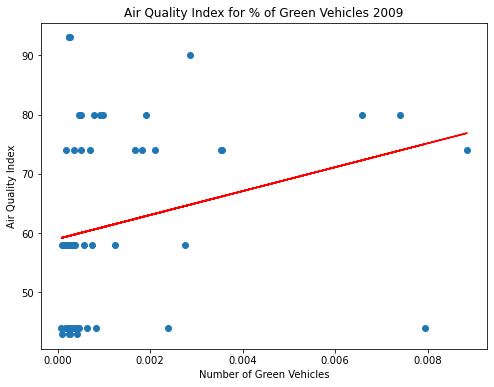

In [27]:
# plot scatter plot percent of green vehciles vs. AQI (2009)

# set x-values as age of vehile and y-values are AQI
x_values = veh_aqi_2009['% Green']
y_values = veh_aqi_2009['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for % of Green Vehicles 2009"
x_label = "Number of Green Vehicles"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_Green_Percent_2009.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)


The r-squared is: 0.04195416542177935


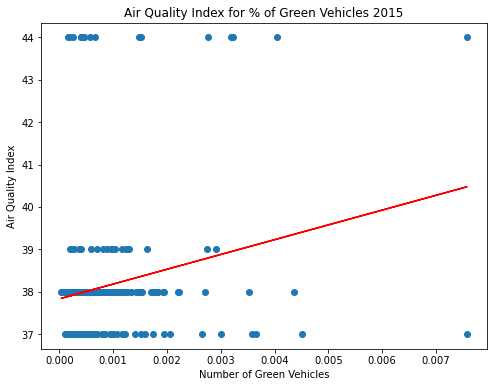

In [28]:
# plot scatter plot percent of green vehciles vs. AQI (2009)

# set x-values as age of vehile and y-values are AQI
x_values = veh_aqi_2015['% Green']
y_values = veh_aqi_2015['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for % of Green Vehicles 2015"
x_label = "Number of Green Vehicles"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_Green_Percent_2015.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)

The r-squared is: 0.10562874605964587


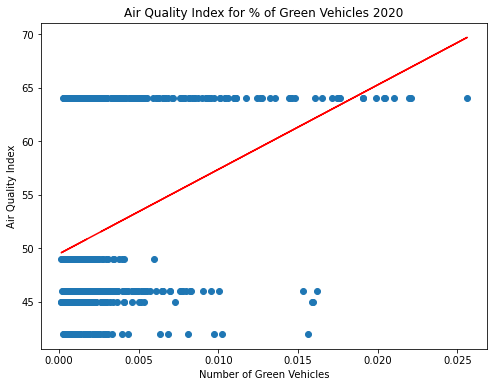

In [29]:
# plot scatter plot percent of green vehciles vs. AQI (2009)

# set x-values as age of vehile and y-values are AQI
x_values = veh_aqi_2020['% Green']
y_values = veh_aqi_2020['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for % of Green Vehicles 2020"
x_label = "Number of Green Vehicles"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_Green_2020.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)